# Modelos de Machine Learning
Após a falha nos testes de modelos de ML com redução da dimensionalidade na etapa anterior, foi realizado o treinamento dos modelos de machine learning com o dataset completo. Para tanto, foi utilizado o Google Colab devido a limitações de hardware da máquina local.

In [ ]:
import numpy as np
import sklearn
from scipy import sparse
from google.colab import drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Carregamento dos datasets de treino e teste

In [ ]:
X_train = sparse.load_npz('drive/MyDrive/''Colab Notebooks''/X_train_blc_sparse.npz')

In [ ]:
y_train = np.loadtxt('drive/MyDrive/''Colab Notebooks''/y_train_balanced.csv', delimiter=',')

In [ ]:
X_test = sparse.load_npz('drive/MyDrive/''Colab Notebooks''/X_test_sparse.npz')

In [ ]:
y_test = np.loadtxt('drive/MyDrive/''Colab Notebooks''/y_test.csv', delimiter=',')

In [ ]:
type(X_train)

scipy.sparse.coo.coo_matrix

In [ ]:
X_train = sparse.vstack([X_train, X_test])
X_train.shape

(6874, 57156)

In [ ]:
y_test = np.hstack([y_train, y_test])
y_test.shape

(6874,)

## Escolha do modelo de machine learning
Será seguido o padrão de escolha de modelos do scikit-learn, disponível em https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html. Como trata-se de um problema de classificação, com dados rotulados e menos de 100 mil amostras, o primeiro modelo a ser testado será o Linear SVC. Caso não apresente resultado satisfatório será testado o algoritmo Naive Bayes.

<img src='drive/MyDrive/''Colab Notebooks''/ml_map.png' />

## Modelo LinearSVC

In [ ]:
%%time
mod_lin_svc_1.fit(X_train, y_train)

CPU times: user 17.7 s, sys: 157 ms, total: 17.9 s
Wall time: 17.9 s


LinearSVC()

## Teste do modelo 1:

In [ ]:
mod_lin_svc_1.score(X_test, y_test)

0.551654964894684

In [ ]:
y_pred = mod_lin_svc_1.predict(X_test)

In [ ]:
y_pred.shape

(997,)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


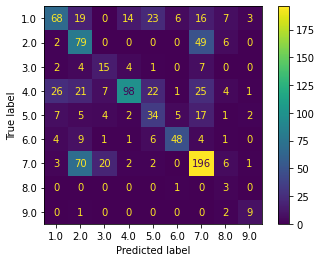

In [ ]:
plot_confusion_matrix(mod_lin_svc_1, X_test, y_test)

In [ ]:
from collections import Counter
Counter(y_test)

Counter({1.0: 156,
         2.0: 136,
         3.0: 33,
         4.0: 205,
         5.0: 77,
         6.0: 74,
         7.0: 300,
         8.0: 4,
         9.0: 12})

In [ ]:
Counter(y_train)

Counter({1.0: 653,
         2.0: 653,
         3.0: 653,
         4.0: 653,
         5.0: 653,
         6.0: 653,
         7.0: 653,
         8.0: 653,
         9.0: 653})

Apresentando uma acurácia de aproximadamente 55%, o primeiro modelo criado com o algoritmo LinearSVC já apresentou resultado bem melhor do que os modelos anteriores treinados com dados com dimensionalidade reduzida.

## Modelo Naive-Bayes

In [ ]:
from sklearn.naive_bayes import ComplementNB

In [ ]:
mod_NB = ComplementNB()

In [ ]:
# O Naive-Bayes supõe que os valores de entrada são não-negativos. Para contornar esta exigência:

#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train_pca)
#X_test = scaler.fit_transform(X_test_pca)

In [ ]:
mod_NB.fit(X_train, y_train)

ComplementNB()

In [ ]:
y_pred_3 = mod_NB.predict(X_test)

In [ ]:
Counter(y_pred_3)

Counter({1.0: 97,
         2.0: 183,
         3.0: 54,
         4.0: 97,
         5.0: 99,
         6.0: 61,
         7.0: 219,
         8.0: 114,
         9.0: 73})

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


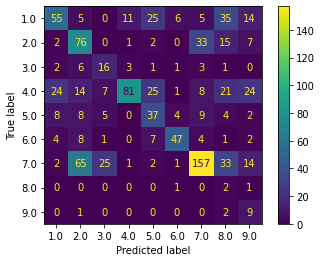

In [ ]:
plot_confusion_matrix(mod_NB, X_test, y_test)

In [ ]:
mod_NB.score(X_test, y_test)

0.48144433299899697

O resultado do modelo Naive-Bayes mostrou-se com desempenho pior do que o modelo LinearSVC. O grid search não foi concluído com sucesso devido ao tempo de execução. Serão testados mais modelos na sequência.